# Smart_Stock_ML: Classification

## Setup and Explore the data

In [51]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import ensemble
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas

#  Import completed dataset
sp500_company_ml_df = pd.read_csv("data/sp500_company_ml.csv")
sp500_company_ml_df.head()

,Year,Outperformed?,Interest Rate (Federal Funds Effective Rate),CPI,UnemploymentRate,GDPGrowthRate,GICS Sector,Gender,Headquarters State,Salary_Bins
0,2015,1,0.11,0.1,5.3,2.9,Health Care,M,California,"(15000000, 20000000]"
1,2016,1,0.34,1.3,4.9,1.8,Health Care,M,California,"(15000000, 20000000]"
2,2017,1,0.65,2.1,4.4,2.5,Health Care,M,California,"(15000000, 20000000]"
3,2018,1,1.41,2.4,3.9,3.0,Health Care,M,California,"(15000000, 20000000]"
4,2019,0,2.40,1.8,3.7,2.5,Health Care,M,California,"(15000000, 20000000]"


In [52]:
# View data info
sp500_company_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          4370 non-null   int64  
 1   Outperformed?                                 4370 non-null   int64  
 2   Interest Rate (Federal Funds Effective Rate)  4370 non-null   float64
 3   CPI                                           4370 non-null   float64
 4   UnemploymentRate                              4370 non-null   float64
 5   GDPGrowthRate                                 4370 non-null   float64
 6   GICS Sector                                   4370 non-null   object 
 7   Gender                                        4370 non-null   object 
 8   Headquarters State                            4370 non-null   object 
 9   Salary_Bins                                   4361 non-null   o

In [53]:
# Determine the number of unique values in each column.
sp500_company_ml_df.nunique()

Year                                             9
Outperformed?                                    2
Interest Rate (Federal Funds Effective Rate)     9
CPI                                              9
UnemploymentRate                                 9
GDPGrowthRate                                    7
GICS Sector                                     11
Gender                                           2
Headquarters State                              49
Salary_Bins                                      7
dtype: int64

## Supervised learning: Classifiers

### Preprocessing

In [54]:
# Convert categorical data to numeric with `pd.get_dummies`
sp500_numeric_df = pd.get_dummies(sp500_company_ml_df, dtype=int)
sp500_numeric_df

,Year,Outperformed?,Interest Rate (Federal Funds Effective Rate),CPI,UnemploymentRate,GDPGrowthRate,GICS Sector_Communication Services,GICS Sector_Consumer Discretionary,GICS Sector_Consumer Staples,GICS Sector_Energy,...,Headquarters State_Virginia,Headquarters State_Washington,Headquarters State_Wisconsin,"Salary_Bins_(0, 5000000]","Salary_Bins_(10000000, 15000000]","Salary_Bins_(15000000, 20000000]","Salary_Bins_(20000000, 25000000]","Salary_Bins_(25000000, 50000000]","Salary_Bins_(5000000, 10000000]","Salary_Bins_(50000000, 300000000]"
0,2015,1,0.11,0.1,5.3,2.9,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016,1,0.34,1.3,4.9,1.8,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,1,0.65,2.1,4.4,2.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2018,1,1.41,2.4,3.9,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2019,0,2.40,1.8,3.7,2.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,2019,1,2.40,1.8,3.7,2.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4366,2020,1,1.55,1.2,8.1,-2.2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4367,2021,1,0.09,4.7,5.4,5.8,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4368,2022,0,0.08,8.0,3.6,1.9,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
# Split the preprocessed data into features and target arrays
y = sp500_numeric_df['Outperformed?'].values
X = sp500_numeric_df.drop(columns=['Outperformed?'], axis=1).values
X_columns = sp500_numeric_df.drop(columns=['Outperformed?'], axis=1).columns

In [56]:
X_columns

Index(['Year', 'Interest Rate (Federal Funds Effective Rate)', 'CPI',
       'UnemploymentRate', 'GDPGrowthRate',
       'GICS Sector_Communication Services',
       'GICS Sector_Consumer Discretionary', 'GICS Sector_Consumer Staples',
       'GICS Sector_Energy', 'GICS Sector_Financials',
       'GICS Sector_Health Care', 'GICS Sector_Industrials',
       'GICS Sector_Information Technology', 'GICS Sector_Materials',
       'GICS Sector_Real Estate', 'GICS Sector_Utilities', 'Gender_F',
       'Gender_M', 'Headquarters State_Alabama', 'Headquarters State_Arizona',
       'Headquarters State_Arkansas', 'Headquarters State_Bermuda',
       'Headquarters State_Bristol', 'Headquarters State_California',
       'Headquarters State_Canada', 'Headquarters State_Colorado',
       'Headquarters State_Connecticut', 'Headquarters State_D.C.',
       'Headquarters State_Delaware', 'Headquarters State_Florida',
       'Headquarters State_Georgia', 'Headquarters State_Idaho',
       'Headquarters S

In [57]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [58]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler instance
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Classifier modeling

----------------------------------------------
Confusion Matrix: KNeighborsClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,283,277
Actual > SP500,229,304


,precision,recall,f1-score,support
Less than SP500 CAGR,0.553,0.505,0.528,560.0
Outperformed SP500 CAGR,0.523,0.57,0.546,533.0
accuracy,,,0.537,
macro avg,0.538,0.538,0.537,1093.0
weighted avg,0.538,0.537,0.537,1093.0


KNeighborsClassifier does not have feature_importances_ attribute.
                                                          
----------------------------------------------
Confusion Matrix: ExtraTreesClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,366,194
Actual > SP500,216,317


,precision,recall,f1-score,support
Less than SP500 CAGR,0.629,0.654,0.641,560.0
Outperformed SP500 CAGR,0.62,0.595,0.607,533.0
accuracy,,,0.625,
macro avg,0.625,0.624,0.624,1093.0
weighted avg,0.625,0.625,0.625,1093.0


Feature Importances for ExtraTreesClassifier:
0.044737: Interest Rate (Federal Funds Effective Rate)
0.039317: CPI
0.039137: Year
0.035170: GDPGrowthRate
0.034332: UnemploymentRate
0.032421: Salary_Bins_(10000000, 15000000]
0.031990: Salary_Bins_(5000000, 10000000]
0.031538: Headquarters State_New York
0.029988: Salary_Bins_(15000000, 20000000]
0.027750: Salary_Bins_(20000000, 25000000]
0.025970: Headquarters State_California
0.024438: Headquarters State_Texas
0.023228: GICS Sector_Information Technology
0.022409: GICS Sector_Financials
0.021742: Headquarters State_Illinois
0.021120: GICS Sector_Health Care
0.020054: Headquarters State_Ohio
0.019693: GICS Sector_Industrials
0.019640: Salary_Bins_(25000000, 50000000]
0.019518: Headquarters State_Florida
0.019087: Headquarters State_Virginia
0.018049: GICS Sector_Consumer Discretionary
0.015639: Headquarters State_Georgia
0.015620: Gender_F
0.015559: GICS Sector_Consumer Staples
0.015498: GICS Sector_Utilities
0.015328: Headquarters Stat

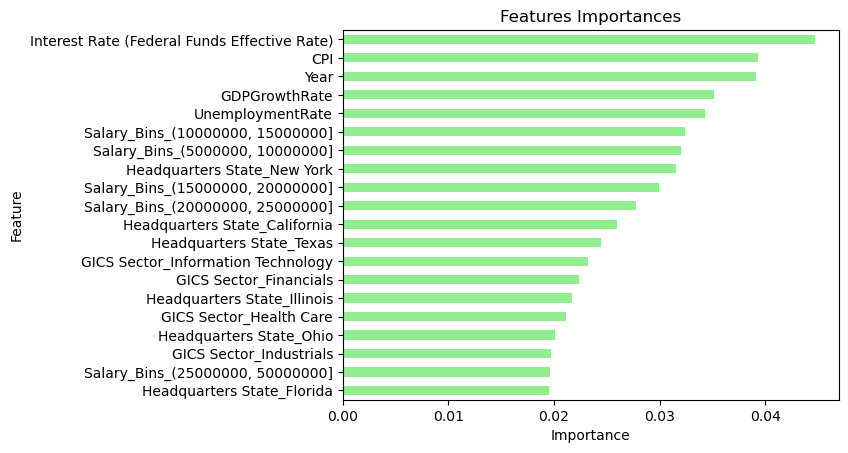

                                                          
----------------------------------------------
Confusion Matrix: LogisticsRegression


,Predicted < SP500,Predicted > SP500
Actual < SP500,331,229
Actual > SP500,223,310


,precision,recall,f1-score,support
Less than SP500 CAGR,0.597,0.591,0.594,560.0
Outperformed SP500 CAGR,0.575,0.582,0.578,533.0
accuracy,,,0.586,
macro avg,0.586,0.586,0.586,1093.0
weighted avg,0.587,0.586,0.587,1093.0


LogisticsRegression does not have feature_importances_ attribute.
                                                          
----------------------------------------------
Confusion Matrix: RandomForestClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,354,206
Actual > SP500,205,328


,precision,recall,f1-score,support
Less than SP500 CAGR,0.633,0.632,0.633,560.0
Outperformed SP500 CAGR,0.614,0.615,0.615,533.0
accuracy,,,0.624,
macro avg,0.624,0.624,0.624,1093.0
weighted avg,0.624,0.624,0.624,1093.0


Feature Importances for RandomForestClassifier:
0.037686: Salary_Bins_(10000000, 15000000]
0.036475: UnemploymentRate
0.035351: Interest Rate (Federal Funds Effective Rate)
0.035166: Year
0.035033: Salary_Bins_(5000000, 10000000]
0.033091: Salary_Bins_(15000000, 20000000]
0.032783: CPI
0.029472: Salary_Bins_(20000000, 25000000]
0.029367: Headquarters State_New York
0.027317: GICS Sector_Information Technology
0.027273: GICS Sector_Financials
0.027125: GDPGrowthRate
0.024963: GICS Sector_Industrials
0.024206: Headquarters State_California
0.023055: GICS Sector_Health Care
0.023016: Salary_Bins_(25000000, 50000000]
0.021693: GICS Sector_Consumer Discretionary
0.021605: Headquarters State_Illinois
0.021024: Headquarters State_Texas
0.019078: GICS Sector_Consumer Staples
0.019005: GICS Sector_Utilities
0.018835: Headquarters State_Ohio
0.018027: Headquarters State_Florida
0.016818: GICS Sector_Real Estate
0.016120: Headquarters State_Virginia
0.015480: Gender_M
0.015267: Gender_F
0.015258:

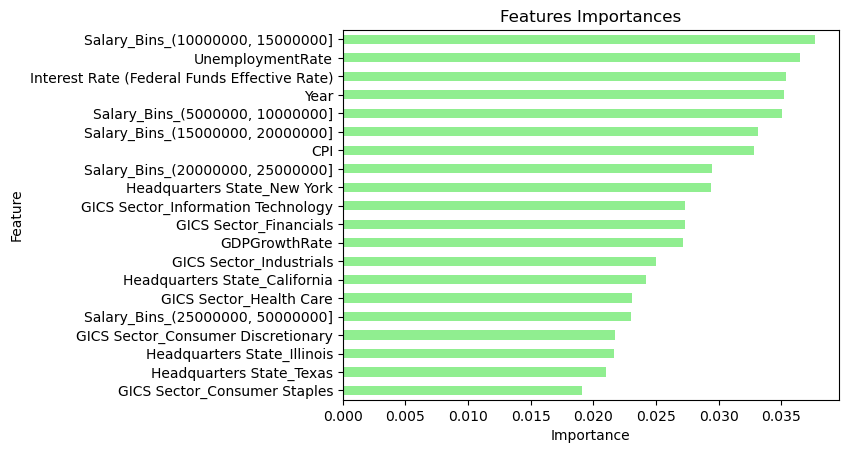

                                                          
----------------------------------------------
Confusion Matrix: BaggingClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,359,201
Actual > SP500,204,329


,precision,recall,f1-score,support
Less than SP500 CAGR,0.638,0.641,0.639,560.0
Outperformed SP500 CAGR,0.621,0.617,0.619,533.0
accuracy,,,0.629,
macro avg,0.629,0.629,0.629,1093.0
weighted avg,0.629,0.629,0.629,1093.0


BaggingClassifier does not have feature_importances_ attribute.
                                                          
----------------------------------------------
Confusion Matrix: AdaBoostClassifier


,Predicted < SP500,Predicted > SP500
Actual < SP500,316,244
Actual > SP500,216,317


,precision,recall,f1-score,support
Less than SP500 CAGR,0.594,0.564,0.579,560.0
Outperformed SP500 CAGR,0.565,0.595,0.58,533.0
accuracy,,,0.579,
macro avg,0.58,0.58,0.579,1093.0
weighted avg,0.58,0.579,0.579,1093.0


Feature Importances for AdaBoostClassifier:
0.206902: Headquarters State_Canada
0.164789: Interest Rate (Federal Funds Effective Rate)
0.109136: GICS Sector_Information Technology
0.090462: GICS Sector_Utilities
0.075977: Headquarters State_D.C.
0.062332: UnemploymentRate
0.060854: GICS Sector_Consumer Staples
0.060533: GDPGrowthRate
0.057018: GICS Sector_Real Estate
0.041511: GICS Sector_Industrials
0.038167: Year
0.032319: GICS Sector_Energy


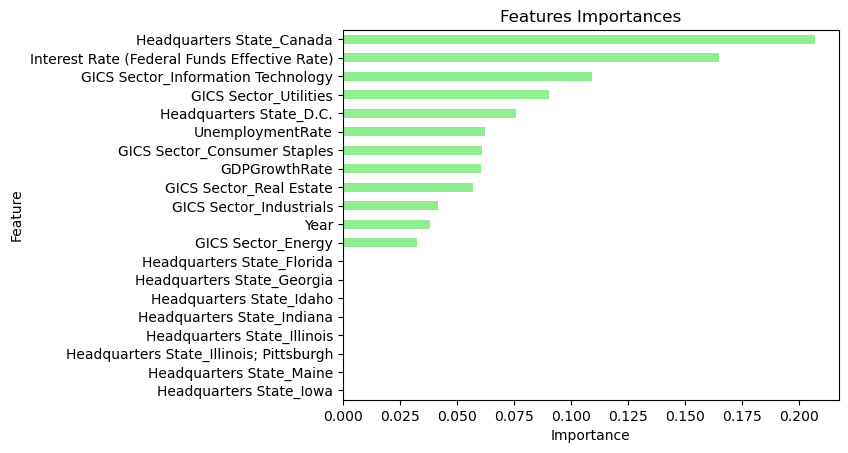

In [59]:
# Create a dictionary of different ml models to run in the loop
ml = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "ExtraTreesClassifier": ensemble.ExtraTreesClassifier(n_estimators=50, random_state=78),
    "LogisticsRegression": LogisticRegression(random_state=78, max_iter=1000),
    "RandomForestClassifier": ensemble.RandomForestClassifier(n_estimators=50, random_state=78),
    "BaggingClassifier": ensemble.BaggingClassifier(n_estimators=50, random_state=78),
    "AdaBoostClassifier": ensemble.AdaBoostClassifier(n_estimators=100, random_state=78, algorithm='SAMME') 
}
report_data = []

for x in ml:
    model = ml[x]
    model.fit(X_train_scaled, y_train)# Create predictions
    y_pred = model.predict(X_test_scaled)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    
    # Calculating the confusion matrix and display as a dataframe
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(
        cm, index=["Actual < SP500", "Actual > SP500"], columns=["Predicted < SP500", "Predicted > SP500"]
    )
    print(f"----------------------------------------------")
    print(f"Confusion Matrix: {x}")
    display(cm_df)
    
    # Calculate report metrics
    target_names = ["Less than SP500 CAGR", "Outperformed SP500 CAGR"]
    report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
    results = {
        "Less than SP500 CAGR": report["Less than SP500 CAGR"],
        "Outperformed SP500 CAGR": report["Outperformed SP500 CAGR"],
        "accuracy": report["accuracy"],
        "macro avg": report["macro avg"],
        "weighted avg": report["weighted avg"]
    }
    # Save report results and display as a dataframe
    report_data.append({**results})
    results_df = pd.DataFrame(results).transpose().round(3)
    results_df = results_df.astype(object)
    results_df.loc["accuracy", results_df.columns != 'f1-score'] = ""
    display(results_df)
    
    # Check if the model has feature_importances_ attribute and print if true
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_names = X_columns
        sorted_importances = sorted(zip(feature_importances, feature_names), reverse=True)
        
        print(f"Feature Importances for {x}:")
        for importance, name in sorted_importances:
            if importance >= 0.001:
                print(f"{importance:.6f}: {name}")
                
         # Visualize the features by importance
        importances_df = pd.DataFrame(sorted_importances)
        importances_df.set_index(importances_df[1], inplace=True)
        importances_df.drop(columns=1, inplace=True)
        importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
        importances_sorted_df = importances_df.sort_values(by='Feature Importances', ascending=False)
        top_importances_df = importances_sorted_df.head(20)
        ax = top_importances_df.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
        ax.invert_yaxis()
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
                
    else:
        print(f"{x} does not have feature_importances_ attribute.")
    print("                                                          ")